In [ ]:
## string to list of characters

list('string')
data = [*'string']


## remove and element in list (data) by index (0)
data.pop(0)

## run a function on every element in a list
list(map(function_name, list_name))

In [ ]:
def read_file(filename):
    # read file
    with open(filename) as f:
        lines = f.readlines()
    output = [str.rstrip(line) for line in lines]    
    return output

def array2bin(binary_array):
    return binary_array.dot(2**np.arange(binary_array.size)[::-1])

def list_str_intersection(a,b):
    return list(set(a).intersection(b))

## convert a list of objects into a list of sets
list_of_sets = [set(val) for val in list_of_objects]
## find the intersection between all set in a list
set.intersection(*list_of_sets)

def list_str_not_intersection(a,b):
    return list(set(a).symmetric_difference(b))


def flatten_list_of_list(regular_list):
    return [item for sublist in regular_list for item in sublist]




## split a list of list (data) 
## seperated by delimitor ('')
## into sublist (record)
import itertools
records = [' '.join(list(y)).split() for x, y in itertools.groupby(data, lambda z: z == '') if not x]


## convert a list of strings into a list of int
list(map(int, list_of_strings))

## convert a character to unicode 
ord(charaacter_variable)

## parse a list (data) n items at a time (in this case 3)
i = iter(data)
data_in_threes = zip(i, i, i)

In [ ]:
class Point(object):
    '''Creates a point on a coordinate plane from a list [x,y].'''

    def __init__(self, coord):
        '''Defines x and y variables'''
        self.x = int(coord[0])
        self.y = int(coord[1])
    
    def display(self):
        print(self.x, self.y)
        
class Line(object):
    
    def __init__(self, point):
        self.start = point[0]
        self.stop = point[1]
    
    def display(self):
        print('start x,y:', self.start.x, self.start.y)
        print('stop x,y:', self.stop.x, self.stop.y)
        
    def max_x(self):
        return max(self.start.x, self.stop.x)
    
    def max_y(self):
        return max(self.start.y, self.stop.y)
    
    def all_points(self):
        if (self.stop.x - self.start.x) == 0:
            y = range_y(self)
            x = np.zeros_like(y) + self.stop.x
        else:
            m = (self.stop.y - self.start.y) / (self.stop.x - self.start.x)
            b = self.stop.y - (m*self.stop.x)
            x = range_x(self)
            y = m*x + b
        return array_to_points(np.stack([y,x]).T.astype('int'))


In [ ]:



from itertools import islice
from collections import deque

def sliding_window(data, size=2, step=1, fillvalue=None):
    '''
    Parameters
    ----------
    iterable : ndarray
        data to move sliding window along
    size : int
        Window size in number of samples
    step : int
        Step size in number of samples to stride across signal

    Returns
    -------
    sig : iterable

    Example
    -------
    window = sliding_window(data, window_size, window_step, fillvalue=0)
    ## get array of data from window
    np.array([list(win) for win in window])
    '''
    if size < 0 or step < 1:
        raise ValueError
    it = iter(data)
    q = deque(islice(it, size), maxlen=size)
    if not q:
        return  # empty iterable or size == 0
    q.extend(fillvalue for _ in range(size - len(q)))  # pad to size
    while True:
        yield iter(q)  # iter() to avoid accidental outside modifications
        try:
            q.append(next(it))
        except StopIteration:  # Python 3.5 pep 479 support
            return
        q.extend(next(it, fillvalue) for _ in range(step - 1))
        

def peaks(sig):
    """
    detects peaks and valleys as defined by the first derivative changing signs
    0  : no peak
    2  : peak second derivative positve
    -2 : peak second derivative negative
    Parameters
    ----------
    signal : ndarray 
        input signal to be analyzed
    Returns
    -------
    peak : ndarray
        list of indicies corresponding to peaks/valleys found in the time-domain of the signal
    """

    peak = signal.lfilter([-1, 1], [1], np.sign(np.diff(sig)))
    peak[0] = 0
    peak = np.append(peak, [0])
    return peak


In [3]:
## get data from AoC
## you need to read the sessionID after you log in, and then go to an input page
## in Chrome view->developer->inspect elements (look under the applications tab) 
## cookies are under the storage section
## https://www.cookieyes.com/blog/how-to-check-cookies-on-your-website-manually/

import urllib.request

def gather_input_data(url, sessionId, transform=lambda x: str(x, "utf-8").strip('\n')):
    request = urllib.request.Request(url)
    request.add_header("cookie", "session={}".format(sessionId)) # Source the data directly from AoC

    values = []
    with urllib.request.urlopen(request) as data:
        for line in data:
            values.append(transform(line))

    return values

def get_data(day, year=2022):
    with open('sessionID') as f:
        sessionId = f.readlines()[0]
    url = "https://adventofcode.com/%d/day/%d/input"%(year,day)
    data = gather_input_data(url, sessionId)
    return data


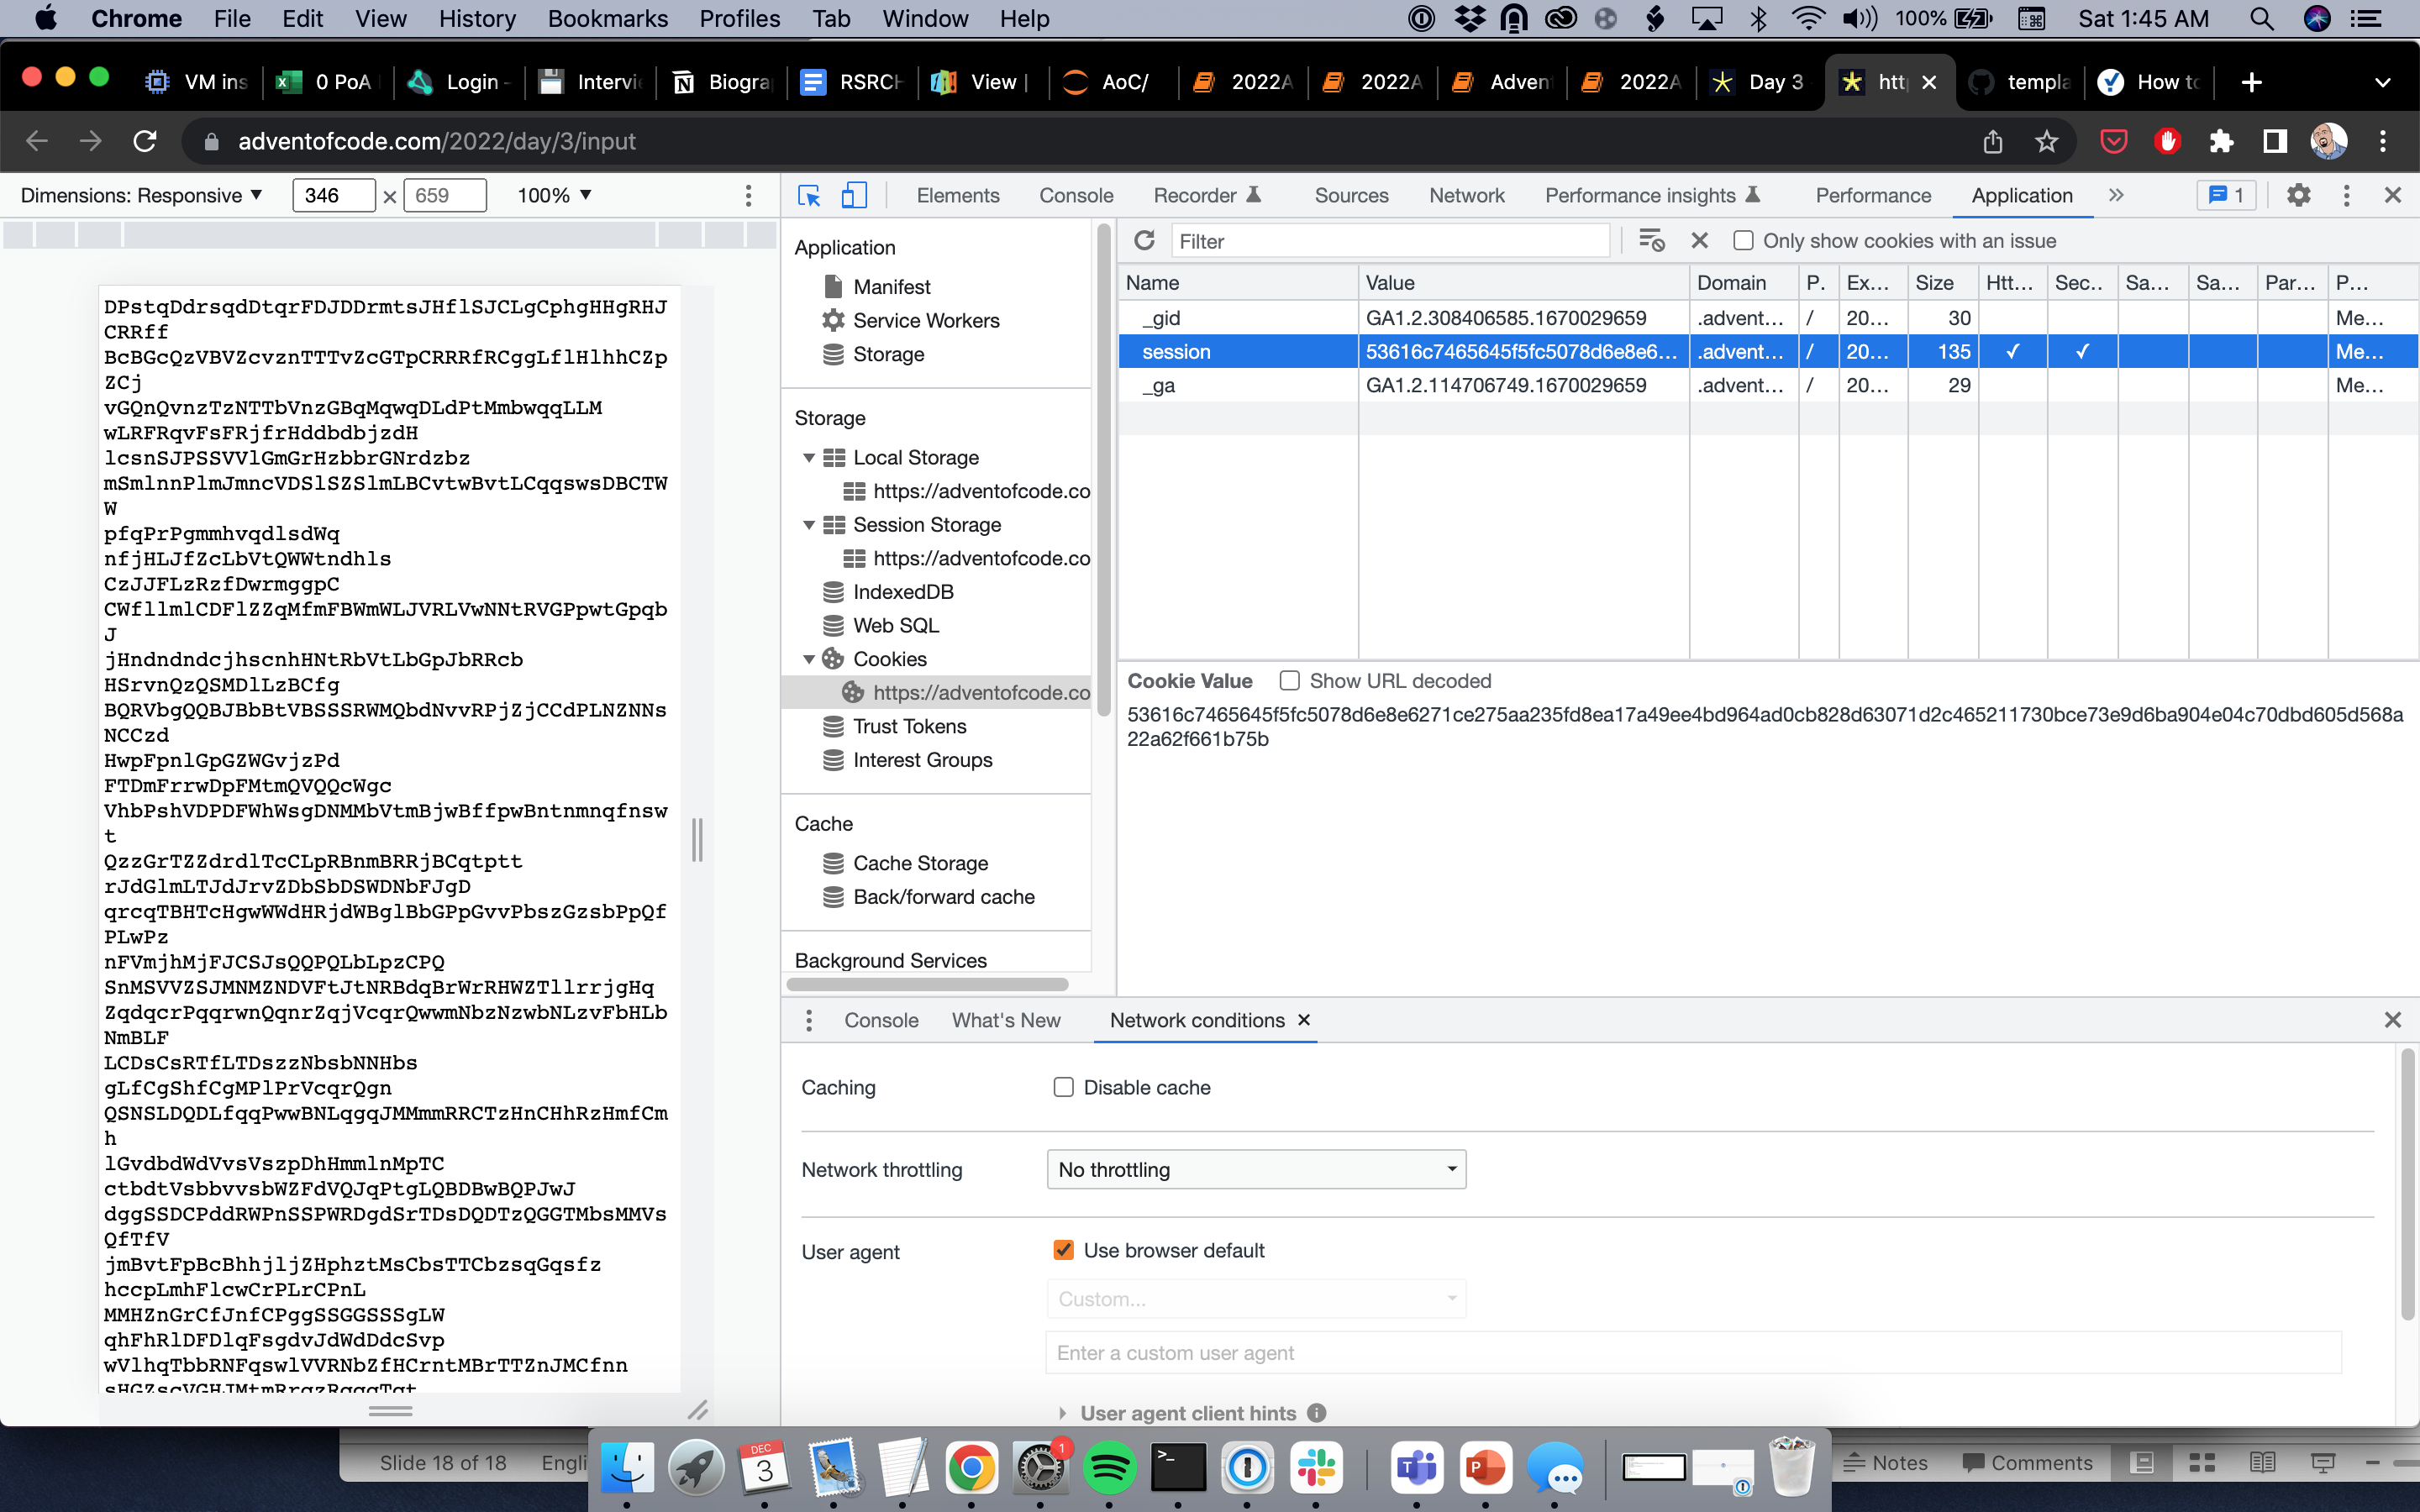